# <font color ='red'>1.Import the data frame

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def first(lab3):
    ## Trabsformation number 1: standardize column headers
    cols=[]
    for i in range (len(lab3.columns)):
        cols.append(lab3.columns[i].lower())
    lab3.columns = cols
    
    ## Transformation number 2: deal with NanN values
    
    # Scenario 1: delete a row if they have all NaN 
    lab3=lab3.dropna(how='all')
    lab3.reset_index(drop=True,inplace=True)
    
    #Scenario 2: Fill in vehicle class unknown values
    lab3['vehicle class']= lab3['vehicle class'].fillna("Unknown")
    
    #Scenario 3: Fill in vhicle size unknown values
    lab3['vehicle size']= lab3['vehicle size'].fillna("Unknown")
    
    #Scenario 4: Fill in vehicle type unknwon values
    lab3['vehicle type']= lab3['vehicle type'].fillna("Unknown")
    
    #Scnario 5: Fill in NaN opn complaints with median number
    med_16=lab3['number of open complaints'].median()
    lab3['number of open complaints']=lab3['number of open complaints'].fillna(med_16)
    
    #Scenario 6: Fill in NaN months since last claim with median value
    med_14=lab3['months since last claim'].median()
    lab3['months since last claim']=lab3['months since last claim'].fillna(med_14)
    
    #Scnario 7: Fill all of columns with NaN data with Unknown
    lab3.fillna("Unknown",inplace=True)    
    return lab3


In [3]:
bun=pd.read_csv('/Users/macbook/Documents/IRON  HACK/Day3_Pandas_Date format/marketing_customer_analysis.csv')

In [4]:
lab5 = first(bun)

In [5]:
lab5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed: 0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer lifetime value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective to date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location code                  10910 non-null  object 
 12  marital status                 10910 non-null 

In [6]:
lab5.head(3)

,unnamed: 0,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,Unknown
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,Unknown
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


In [7]:
lab5.describe()

,unnamed: 0,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.082401,48.091934,0.361962,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,9.787208,27.940675,0.890134,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## <font color ='red'>02 - Cleaning/Wrangling/EDA

### <font color= 'green'> 2.a.Split categorical Features and Numerical Features.

In [8]:
X=lab5.drop(['customer','unnamed: 0','location code','policy type','vehicle type','vehicle size','effective to date'],axis=1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10910 non-null  object 
 1   customer lifetime value        10910 non-null  float64
 2   response                       10910 non-null  object 
 3   coverage                       10910 non-null  object 
 4   education                      10910 non-null  object 
 5   employmentstatus               10910 non-null  object 
 6   gender                         10910 non-null  object 
 7   income                         10910 non-null  int64  
 8   marital status                 10910 non-null  object 
 9   monthly premium auto           10910 non-null  int64  
 10  months since last claim        10910 non-null  float64
 11  months since policy inception  10910 non-null  int64  
 12  number of open complaints      10910 non-null 

In [10]:
X_num=X._get_numeric_data()
X_num.shape

(10910, 8)

In [11]:
X_cat=X.select_dtypes('object')
X_cat.shape

(10910, 11)

### <font color= 'green'> 2.b.Explore visually both sets of features, to identify next steps.

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly premium auto'}>,
        <AxesSubplot:title={'center':'months since last claim'}>],
       [<AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'number of policies'}>,
        <AxesSubplot:title={'center':'total claim amount'}>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

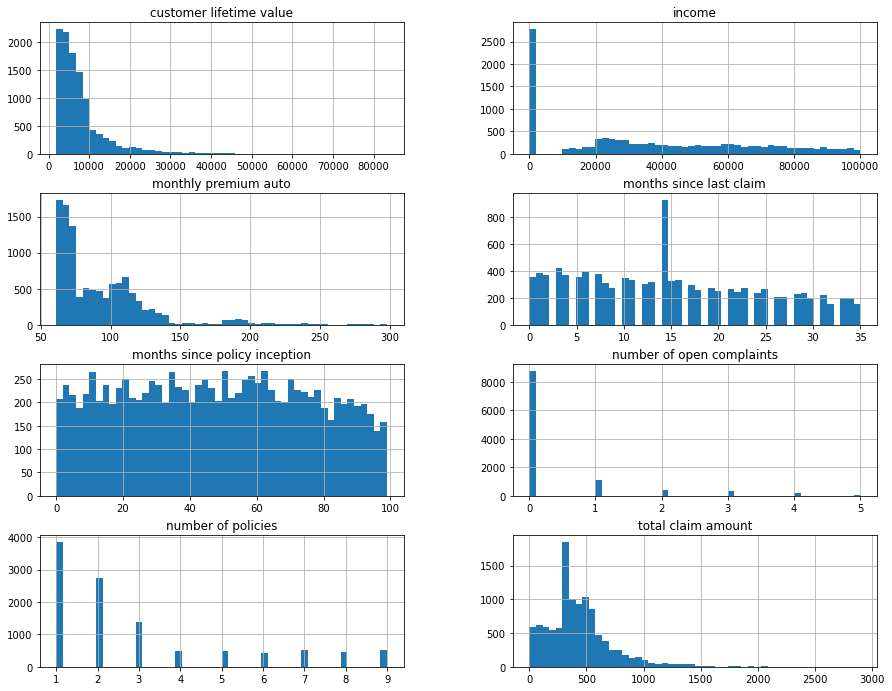

In [12]:
X_num.hist(figsize=(15,15), bins=50, layout=(5,2))

In [48]:
#We can see in customer lifetime value and monthly premium auto, it has outliers , which should be remove

In [49]:
corre_matrix=X.corr() #only for numerical filed
corre_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.028306,0.403069,0.015874,0.016960,-0.030616,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.022708,-0.005903,0.008425,-0.009960,-0.354141
monthly premium auto,0.403069,-0.009788,1.000000,0.008489,0.018953,-0.010059,-0.020505,0.631799
months since last claim,0.015874,-0.022708,0.008489,1.000000,-0.038157,0.005004,0.006807,0.012340
months since policy inception,0.016960,-0.005903,0.018953,-0.038157,1.000000,0.004165,-0.009123,0.003095
number of open complaints,-0.030616,0.008425,-0.010059,0.005004,0.004165,1.000000,0.001681,-0.012380
number of policies,0.016024,-0.009960,-0.020505,0.006807,-0.009123,0.001681,1.000000,-0.008923
total claim amount,0.232626,-0.354141,0.631799,0.012340,0.003095,-0.012380,-0.008923,1.000000


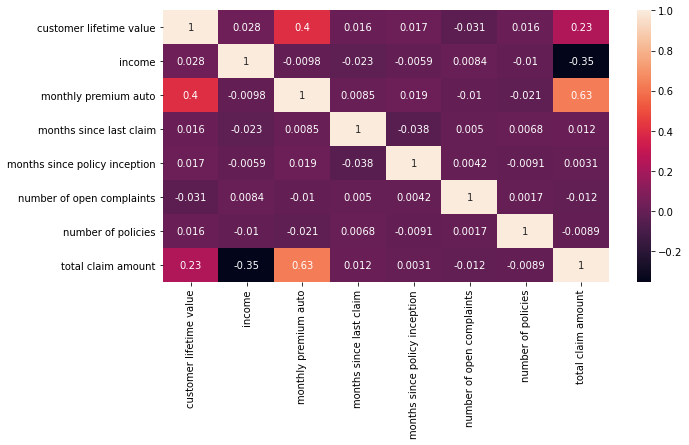

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(corre_matrix, annot=True);

### <font color= 'green'>2.c. Delete outliers in customer lifetime value and montly premium auto

In [51]:
iqr=np.percentile(X['customer lifetime value'],75)-np.percentile(X['customer lifetime value'],25)
iqr

4978.326024

In [52]:
upper_limit=np.percentile(X['customer lifetime value'],75)+1.5*iqr
lower_limit=np.percentile(X['customer lifetime value'],25)-1.5*iqr
print (upper_limit, lower_limit)

16460.268173 -3453.035923


In [53]:
data_exc_out=X[(X['customer lifetime value']>lower_limit)&(X['customer lifetime value']<upper_limit)]

<AxesSubplot:>

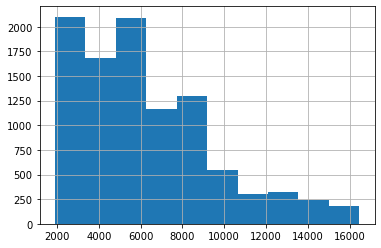

In [54]:
data_exc_out['customer lifetime value'].hist()

In [55]:
data_exc_out.reset_index(drop=True, inplace=True)


In [56]:
data_exc_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9926 entries, 0 to 9925
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9926 non-null   object 
 1   customer lifetime value        9926 non-null   float64
 2   response                       9926 non-null   object 
 3   coverage                       9926 non-null   object 
 4   education                      9926 non-null   object 
 5   employmentstatus               9926 non-null   object 
 6   gender                         9926 non-null   object 
 7   income                         9926 non-null   int64  
 8   marital status                 9926 non-null   object 
 9   monthly premium auto           9926 non-null   int64  
 10  months since last claim        9926 non-null   float64
 11  months since policy inception  9926 non-null   int64  
 12  number of open complaints      9926 non-null   f

In [57]:
def log_transform_clean(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0
data_exc_out['monthly premium auto']=list(map(log_transform_clean,data_exc_out['monthly premium auto']))

<ipython-input-57-4273e18bd32a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exc_out['monthly premium auto']=list(map(log_transform_clean,data_exc_out['monthly premium auto']))


<AxesSubplot:>

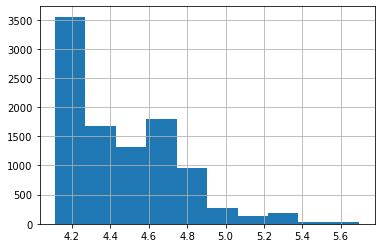

In [58]:
data_exc_out['monthly premium auto'].hist()

In [59]:
#check the info of 2files
bun_num=data_exc_out._get_numeric_data()
bun_num.shape

(9926, 8)

In [60]:
bun_cat=data_exc_out.select_dtypes('object')
bun_cat.shape

(9926, 11)

## <font color ='red'>3.Processing the data
### <font color ='green'> 3.a. Implement standard scaler on numerical columns to reduce the range of value in each variable, make it more consistent

In [61]:
from sklearn.preprocessing import StandardScaler   #standard scaler on numerical columns
scaler = StandardScaler()
scaled=scaler.fit(bun_num)
scaled_bun_num=scaled.transform(bun_num)

In [62]:
scaled_bun_num

array([[-0.45339067,  0.34618135, -1.21364749, ..., -0.40759683,
         2.39484121, -0.47271997],
       [-1.24896941, -1.23324988, -1.04838747, ..., -0.40759683,
        -0.82793453,  1.16461903],
       [ 2.67218002, -0.50520999,  0.48784691, ..., -0.40759683,
        -0.42508756,  0.20521272],
       ...,
       [-0.31459388,  0.77753323, -0.9950181 , ..., -0.40759683,
         1.18630031, -0.54435583],
       [ 1.75475378,  0.87779944,  2.06242025, ...,  4.00560867,
         1.18630031,  0.70601683],
       [ 0.17806262, -1.23324988,  0.52209849, ..., -0.40759683,
        -0.02224059,  2.16701445]])

In [63]:
scaled_X_bun_df = pd.DataFrame(scaled_bun_num, index=bun_num.index, columns=bun_num.columns)

array([[<AxesSubplot:title={'center':'customer lifetime value'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'monthly premium auto'}>,
        <AxesSubplot:title={'center':'months since last claim'}>],
       [<AxesSubplot:title={'center':'months since policy inception'}>,
        <AxesSubplot:title={'center':'number of open complaints'}>],
       [<AxesSubplot:title={'center':'number of policies'}>,
        <AxesSubplot:title={'center':'total claim amount'}>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

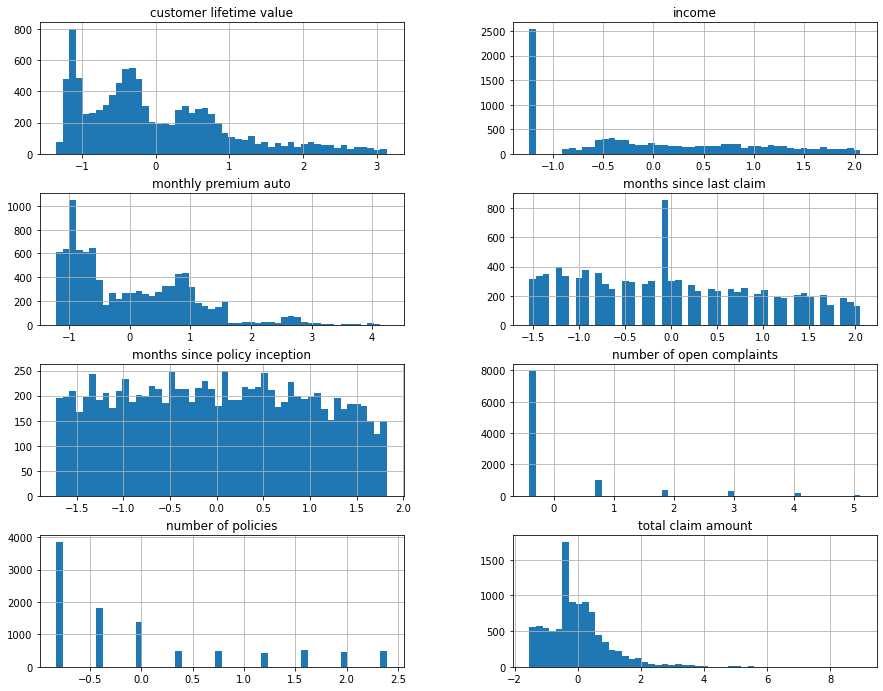

In [64]:
scaled_X_bun_df.hist(figsize=(15,15), bins=50, layout=(5,2)) 
#visualise the numerical filed after droping outliers and standard scaler function.

### <font color ='green'> 3.a. Encode the categorical filed before concat and run the predictting model

In [65]:
data_exc_out.drop(['total claim amount'],axis=1)


,state,customer lifetime value,response,coverage,education,employmentstatus,gender,income,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy,renew offer type,sales channel,vehicle class
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Married,4.110874,7.0,52,0.0,9,Corporate L3,Offer3,Agent,Four-Door Car
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Single,4.158883,3.0,26,0.0,1,Personal L3,Offer4,Call Center,Four-Door Car
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Single,4.605170,34.0,31,0.0,2,Personal L3,Offer3,Call Center,SUV
3,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Married,4.762174,14.0,31,0.0,7,Personal L2,Offer1,Branch,Four-Door Car
4,Unknown,4745.181764,Unknown,Basic,High School or Below,Employed,M,50549,Divorced,4.110874,2.0,73,0.0,7,Personal L3,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9921,Arizona,2771.663013,No,Basic,College,Employed,M,59855,Married,4.304065,30.0,82,4.0,1,Personal L2,Offer2,Branch,Two-Door Car
9922,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Married,5.533389,14.0,40,0.0,7,Personal L1,Offer3,Web,Luxury Car
9923,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Married,4.174387,7.0,68,0.0,6,Personal L3,Offer2,Branch,Four-Door Car
9924,California,11971.977650,No,Premium,College,Employed,F,64195,Divorced,5.062595,0.0,27,4.0,6,Personal L1,Offer1,Branch,SUV


In [66]:
X_dummies=pd.get_dummies(bun_cat, drop_first=True)

In [67]:
X_dummies.shape

(9926, 40)

### <font color ='green'> 3.b. Concat 2 data frames

In [68]:
lab5_final=pd.concat((bun_num,X_dummies),axis=1)

In [69]:
lab5_final.shape

(9926, 48)

In [70]:
y=lab5_final['total claim amount']


In [71]:
B=lab5_final.drop(['total claim amount'],axis=1)


In [72]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9926 entries, 0 to 9925
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer lifetime value         9926 non-null   float64
 1   income                          9926 non-null   int64  
 2   monthly premium auto            9926 non-null   float64
 3   months since last claim         9926 non-null   float64
 4   months since policy inception   9926 non-null   int64  
 5   number of open complaints       9926 non-null   float64
 6   number of policies              9926 non-null   int64  
 7   state_California                9926 non-null   uint8  
 8   state_Nevada                    9926 non-null   uint8  
 9   state_Oregon                    9926 non-null   uint8  
 10  state_Unknown                   9926 non-null   uint8  
 11  state_Washington                9926 non-null   uint8  
 12  response_Unknown                99


### <font color ='green'> 3.c. Define X and y, the y value you are seeking to predict is claim amount.
### <font color ='green'> Splitting into train set and test dataset using random state, eg 80%:20% .

In [73]:

X_train,X_test,y_train,y_test=train_test_split(B,y,test_size=0.2, random_state=80)

## <font color ='red'>4. Modeling
### <font color ='green'> 4.a. Apply linear regression model from sklearn.linear_model.

### Fit over your train data and predict against X test.

In [74]:
lm=linear_model.LinearRegression() #configure model 
model=lm.fit(X_train,y_train)

In [75]:
preds=lm.predict(X_test)

In [76]:
preds

array([718.08948301, 496.75551842, 160.10556966, ...,  91.54697897,
       240.58271966, 412.13244594])

## <font color ='red'>06 - Model Validation
#You should gather appropriate metrics to evaluate model accuracy over y_test- such as : R2. MSE. RMSE. MAE.

In [77]:
r2_score(y_test,preds)

0.514652421335888

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = y_test
y_pred = preds
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

In [43]:
mse

34661.30797041163

In [44]:
rmse

186.1754762862489

In [45]:
mae

136.1024768472751

## <font color ='red'>07 - Reporting

In [46]:
#look at r2: 51% of the model predictions are correct
# however mse, rmse, mae show a big value which can be indicated that it is not a good predict model.
